In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default="plotly_white"

In [4]:
df = pd.read_csv("sample.csv", encoding='latin1')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

 Q1)You need to calculate the monthly sales of the store and identify which month had the 
highest sales and which month had the lowest sales.

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Changing Data 

In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'])


In [9]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [10]:
from datetime import datetime
df['Year']=pd.DatetimeIndex(df['Order Date']).year

In [11]:
df["Order_Month"]=df["Order Date"].dt.month
df["Order_Year"]=df["Order Date"].dt.year
df['Order Day of Week']=df["Order Date"].dt.dayofweek

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015,6


In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015,6


In [14]:
from datetime import datetime
df['month']=pd.DatetimeIndex(df['Order Date']).month

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Customer Name      9994 non-null   object        
 7   Segment            9994 non-null   object        
 8   Country            9994 non-null   object        
 9   City               9994 non-null   object        
 10  State              9994 non-null   object        
 11  Postal Code        9994 non-null   int64         
 12  Region             9994 non-null   object        
 13  Product ID         9994 non-null   object        
 14  Category

In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2016,1,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2016,1,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015,6,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015,6,10


In [17]:
month_label = {
    1.0: 'Jan',
    2.0: 'Feb',
    3.0: 'Mar',
    4.0: 'Apr',
    5.0: 'May',
    6.0: 'Jun',
    7.0: 'Jul',
    8.0: 'Aug',
    9.0: 'Sep',
    10.0: 'Oct',
    11.0: 'Nov',
    12.0: 'Dec'
}
df['month']=df.month.map(month_label)

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2016,1,Nov
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2016,1,Nov
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016,6,Jun
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015,6,Oct
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015,6,Oct


In [19]:
Monthly_sales=df['month'].value_counts().reset_index()
Monthly_sales.head()

,month,count
0,Nov,1471
1,Dec,1408
2,Sep,1383
3,Oct,819
4,May,735


<Axes: xlabel='month', ylabel='count'>

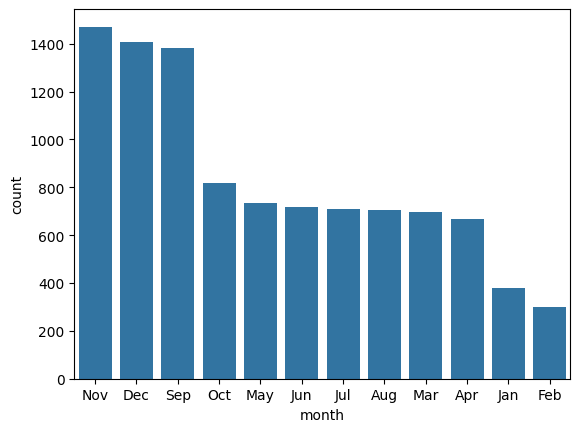

In [20]:
sns.barplot(x='month',y='count',data=Monthly_sales)

In [21]:
Mon_sales=df.groupby('month')['Sales'].sum()
print(Mon_sales)


month
Apr    137762.1286
Aug    159044.0630
Dec    325293.5035
Feb     59751.2514
Jan     94924.8356
Jul    147238.0970
Jun    152718.6793
Mar    205005.4888
May    155028.8117
Nov    352461.0710
Oct    200322.9847
Sep    307649.9457
Name: Sales, dtype: float64


In [22]:
print(Mon_sales.shape)

(12,)


In [23]:
result=pd.DataFrame({'Total_sales':Mon_sales})
result.head()
result.shape

(12, 1)

In [24]:
result=result.reset_index()
result.shape

(12, 2)

In [25]:
print(result)


   month  Total_sales
0    Apr  137762.1286
1    Aug  159044.0630
2    Dec  325293.5035
3    Feb   59751.2514
4    Jan   94924.8356
5    Jul  147238.0970
6    Jun  152718.6793
7    Mar  205005.4888
8    May  155028.8117
9    Nov  352461.0710
10   Oct  200322.9847
11   Sep  307649.9457


In [26]:
result.shape

(12, 2)

In [27]:
result['month'].dtype
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        12 non-null     object 
 1   Total_sales  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes


In [28]:
result.columns=['Month','Total_sales']

In [29]:
result.head()

,Month,Total_sales
0,Apr,137762.1286
1,Aug,159044.0630
2,Dec,325293.5035
3,Feb,59751.2514
4,Jan,94924.8356


<Axes: xlabel='Month', ylabel='Total_sales'>

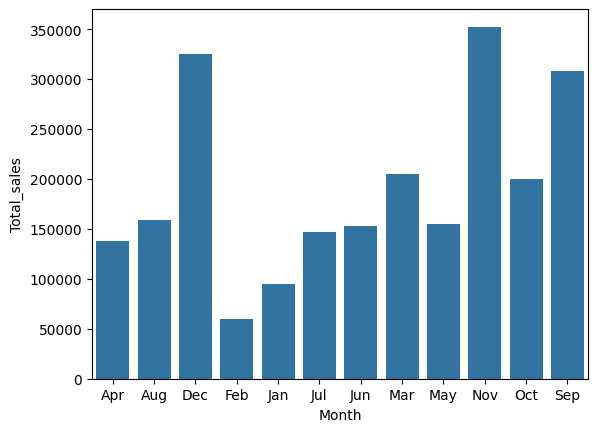

In [30]:
sns.barplot(x='Month',y='Total_sales',data=result)

In [31]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2016,1,Nov
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2016,1,Nov
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016,6,Jun
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015,6,Oct
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015,6,Oct


In [32]:
Sales_by_month=df.groupby('Order_Month')['Sales'].sum().reset_index()

In [33]:
Sales_by_month.head()

,Order_Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117


In [34]:
Sales_by_month=df.groupby('Order_Month')['Sales'].sum().reset_index()

<Axes: xlabel='Order_Month', ylabel='Sales'>

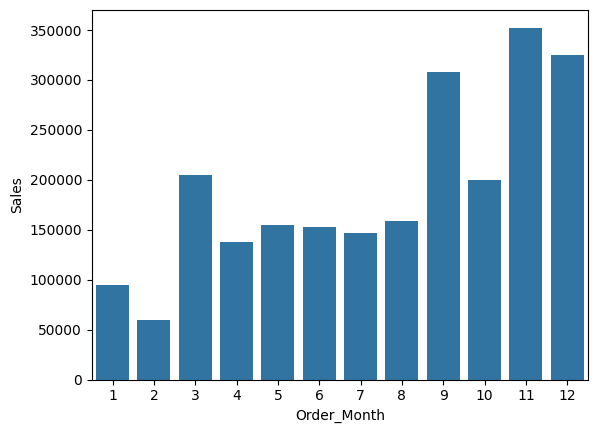

In [35]:
sns.barplot(x='Order_Month',y='Sales',data=Sales_by_month)

In [36]:
month_labels = {
    1.0: 'Jan',
    2.0: 'Feb',
    3.0: 'Mar',
    4.0: 'Apr',
    5.0: 'May',
    6.0: 'Jun',
    7.0: 'Jul',
    8.0: 'Aug',
    9.0: 'Sep',
    10.0: 'Oct',
    11.0: 'Nov',
    12.0: 'Dec'
}
df['Order_Month']=df.Order_Month.map(month_labels)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,Nov,2016,1,Nov
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,Nov,2016,1,Nov
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,Jun,2016,6,Jun
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,Oct,2015,6,Oct
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,Oct,2015,6,Oct


In [37]:
df['Naam_bata']=df['Order_Month'].map(month_labels)

In [38]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week,month,Naam_bata
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,Nov,2016,1,Nov,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,Nov,2016,1,Nov,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,2016,Jun,2016,6,Jun,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,Oct,2015,6,Oct,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,2015,Oct,2015,6,Oct,NaN


In [39]:
Sales_by_month=df.groupby('Order_Month')['Sales'].sum().reset_index()

Text(0, 0.5, 'How_Much')

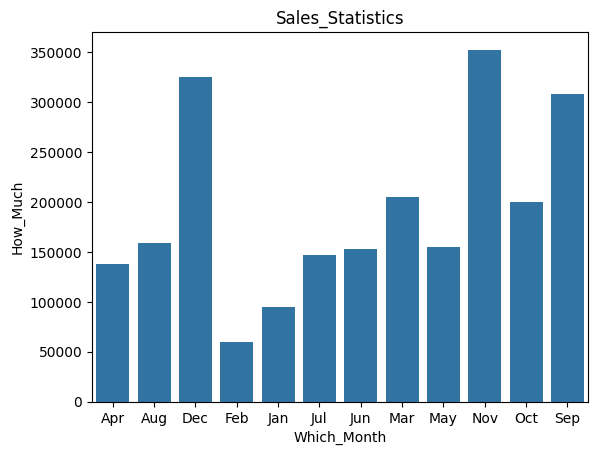

In [40]:
sns.barplot(x='Order_Month',y='Sales',data=Sales_by_month)
plt.title("Sales_Statistics")
plt.xlabel("Which_Month")
plt.ylabel("How_Much")

In [41]:
fig=px.line(Sales_by_month,x='Order_Month',y="Sales",title="Monthly_Sales_Graph")

In [42]:
fig.show()

Q2)Which category has lowest sales and highest sales??

In [43]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week,month,Naam_bata
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,Nov,2016,1,Nov,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,Nov,2016,1,Nov,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,2016,Jun,2016,6,Jun,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,Oct,2015,6,Oct,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,2015,Oct,2015,6,Oct,NaN


In [44]:
Category_data=df.groupby('Category')['Sales'].sum().reset_index()

In [45]:
print(Category_data)

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


In [46]:
Category_data.dtypes

Category     object
Sales       float64
dtype: object

In [47]:
print(Category_data)

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


In [48]:
Category_data.shape

(3, 2)

In [49]:
print(Category_data)

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


<Axes: xlabel='Category', ylabel='Sales'>

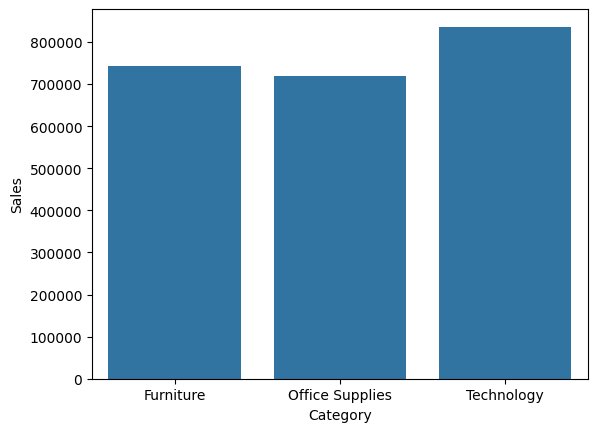

In [83]:
sns.barplot(x='Category',y='Sales',data=Category_data)

In [51]:
# Best approach (Method 1)
Result2 = Category_data.copy()
Result2.columns = ['Different_Cat', 'Total_sales']

# Verify
print(Result2.head())

     Different_Cat  Total_sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


In [52]:
Result1.shape

(3, 2)

In [53]:
Result1.head

<bound method NDFrame.head of    Diffrent_Cat  Total_sales
0           NaN          NaN
1           NaN          NaN
2           NaN          NaN>

In [54]:
print(Result1.columns)

Index(['Diffrent_Cat', 'Total_sales'], dtype='object')


In [55]:
Result1.head

<bound method NDFrame.head of    Diffrent_Cat  Total_sales
0           NaN          NaN
1           NaN          NaN
2           NaN          NaN>

Result1.head

<Axes: xlabel='Different_Cat', ylabel='Total_sales'>

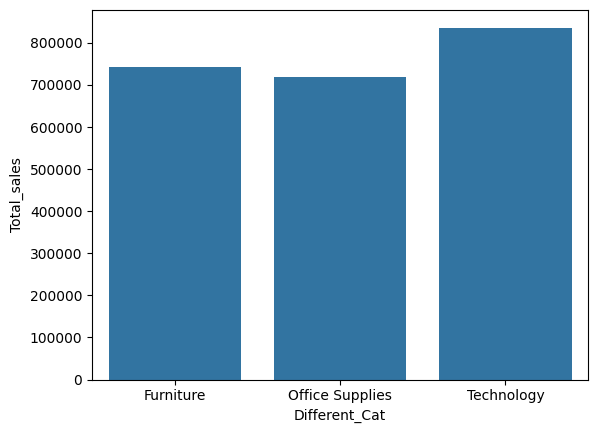

In [56]:
sns.barplot(x='Different_Cat',y='Total_sales',data=Result2)

In [58]:
Result2.head()

,Different_Cat,Total_sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [60]:
fig=px.line(Result2,x="Different_Cat",y='Total_sales')

In [62]:
fig.show()

In [68]:
fig = px.pie(Result2, 
             values='Total_sales',
             names='Different_Cat',
             hole=0.2,
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Fixed: "Pastel" (not "Pastel1"?)

fig.update_traces(textposition='inside', textinfo='percent+label')  # Fixed: update_traces() + textinfo
fig.update_layout(title_text='Sales Analysis by Category', 
                  title_font=dict(size=24))  # Fixed: title_font → title_font, and proper dict syntax

fig.show()

SUB-CATEGORY

In [70]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week,month,Naam_bata
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,Nov,2016,1,Nov,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,Nov,2016,1,Nov,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,2016,Jun,2016,6,Jun,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,Oct,2015,6,Oct,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,2015,Oct,2015,6,Oct,NaN


In [71]:
Sub_category=df.groupby('Sub-Category')['Sales'].sum().reset_index()

In [79]:
Sub_category.dtypes

Sub-Category     object
Sales           float64
dtype: object

In [72]:
print(Sub_category)

   Sub-Category        Sales
0   Accessories  167380.3180
1    Appliances  107532.1610
2           Art   27118.7920
3       Binders  203412.7330
4     Bookcases  114879.9963
5        Chairs  328449.1030
6       Copiers  149528.0300
7     Envelopes   16476.4020
8     Fasteners    3024.2800
9   Furnishings   91705.1640
10       Labels   12486.3120
11     Machines  189238.6310
12        Paper   78479.2060
13       Phones  330007.0540
14      Storage  223843.6080
15     Supplies   46673.5380
16       Tables  206965.5320


In [73]:
print(Sub_category.columns)

Index(['Sub-Category', 'Sales'], dtype='object')


<Axes: xlabel='Sub-Category', ylabel='Sales'>

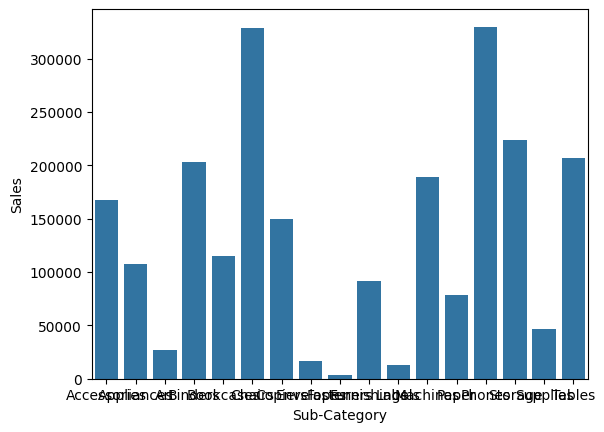

In [80]:
sns.barplot(x='Sub-Category',y='Sales',data=Sub_category)


In [86]:
Sub_category = Sub_category.rename(columns={'Sub-Category': 'Product_Category','Sales':'Total_sales'})

In [87]:
print(Sub_category)

   Product_Category  Total_sales
0       Accessories  167380.3180
1        Appliances  107532.1610
2               Art   27118.7920
3           Binders  203412.7330
4         Bookcases  114879.9963
5            Chairs  328449.1030
6           Copiers  149528.0300
7         Envelopes   16476.4020
8         Fasteners    3024.2800
9       Furnishings   91705.1640
10           Labels   12486.3120
11         Machines  189238.6310
12            Paper   78479.2060
13           Phones  330007.0540
14          Storage  223843.6080
15         Supplies   46673.5380
16           Tables  206965.5320


In [81]:
fig=px.line(Sub_category,x='Sub-Category',y='Sales',title="Sub-category division")

In [82]:
fig.show()

In [89]:
print(Sub_category)

   Product_Category  Total_sales
0       Accessories  167380.3180
1        Appliances  107532.1610
2               Art   27118.7920
3           Binders  203412.7330
4         Bookcases  114879.9963
5            Chairs  328449.1030
6           Copiers  149528.0300
7         Envelopes   16476.4020
8         Fasteners    3024.2800
9       Furnishings   91705.1640
10           Labels   12486.3120
11         Machines  189238.6310
12            Paper   78479.2060
13           Phones  330007.0540
14          Storage  223843.6080
15         Supplies   46673.5380
16           Tables  206965.5320


In [90]:
fig=px.bar(Sub_category,x='Product_Category',y="Total_sales",title='Sales anyalysis by sub-Category')

In [91]:
fig.show()

In [92]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,Order_Month,Order_Year,Order Day of Week,month,Naam_bata
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,Nov,2016,1,Nov,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,Nov,2016,1,Nov,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,2016,Jun,2016,6,Jun,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,Oct,2015,6,Oct,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,2015,Oct,2015,6,Oct,NaN


In [93]:
Profit=df.groupby('month')['Profit'].sum().reset_index()

In [94]:
print(Profit)

   month      Profit
0    Apr  11587.4363
1    Aug  21776.9384
2    Dec  43369.1919
3    Feb  10294.6107
4    Jan   9134.4461
5    Jul  13832.6648
6    Jun  21285.7954
7    Mar  28594.6872
8    May  22411.3078
9    Nov  35468.4265
10   Oct  31784.0413
11   Sep  36857.4753


In [95]:
fig=px.bar(Profit,x='month',y='Profit',title='Profit Montly analysis')

In [96]:
fig.show()

Sales and profit for customer

In [97]:
sales_profit_by_segment=df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()

In [98]:
print(sales_profit_by_segment)

       Segment         Sales       Profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785


In [99]:
# Import Plotly's color palette (assuming 'colors' is from 'plotly.colors')
color_palette = colors.qualitative.Pastel1  # Note: Fixed typo ("Paste1" → "Pastel1")

# Initialize an empty figure
fig = go.Figure()

# Add a bar trace for Sales data
fig.add_trace(go.Bar(
    x=sales_profit_by_segment['Segment'],  # X-axis: Customer segments
    y=sales_profit_by_segment['Sales'],    # Y-axis: Sales values
    name='Sales',                          # Legend label
    marker_color=color_palette[0]          # Bar color (first in palette)
))

# Add a bar trace for Profit data
fig.add_trace(go.Bar(
    x=sales_profit_by_segment['Segment'],  # X-axis: Customer segments
    y=sales_profit_by_segment['Profit'],   # Y-axis: Profit values
    name='Profit',                         # Legend label
    marker_color=color_palette[1]          # Bar color (second in palette)
))

# Customize the layout
fig.update_layout(
    title='Sales and Profit Analysis by Customer Segment',  # Chart title
    xaxis_title='Customer Segment',                        # X-axis label
    yaxis_title='Amount'                                   # Y-axis label
)

# Display the figure
fig.show()

Sales to Profit Ratio

In [103]:
sales_profit_by_segment=df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_ratio']=sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment','Sales_to_Profit_ratio']])

       Segment  Sales_to_Profit_ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


In [105]:
print(sales_profit_by_segment)

       Segment         Sales       Profit  Sales_to_Profit_ratio
0     Consumer  1.161401e+06  134119.2092               8.659471
1    Corporate  7.061464e+05   91979.1340               7.677245
2  Home Office  4.296531e+05   60298.6785               7.125416
